In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cfgrib

  Using cached cfgrib-0.9.15.0-py3-none-any.whl.metadata (55 kB)
  Using cached eccodes-2.41.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (14 kB)
  Using cached findlibs-0.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached cfgrib-0.9.15.0-py3-none-any.whl (48 kB)
Using cached eccodes-2.41.0-cp311-cp311-manylinux_2_28_x86_64.whl (7.4 MB)
Using cached findlibs-0.1.1-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### **<font color="Purple"> Datos de ERA5 </font>**

### **<font color="olive"> Temperatura</font>**

##### Climatología diaria

In [9]:
t2m_file = 'datasetsok/anomalias_day_t2mE5.nc'

In [10]:
t2m_anom = xr.open_dataset(t2m_file)
t2m_anomday = t2m_anom['t2m']
t2m_anomday['time'] = t2m_anomday.time.dt.floor("D")

In [11]:
t2m_anomday_invs = t2m_anomday.sel(time=t2m_anomday['time.month'].isin([12, 1, 2])) 
#no es necesario porque el .sel lo hace por fechas

##### **<font color="olive"> Geopotencial </font>**

##### **<font color="olive"> Concat de índice >1 y valores de gph </font>**

In [12]:
# esta es la base que tiene solo las fechas cuando el índice > 1
# es también las anomalías del ciclo anual de gph

In [13]:
# idxp_gph_file = 'datasetsok/gph_et_indiceP+.nc'
idxp_gph_file = 'datasetsok/gph_idx_std+.nc'

In [14]:
idxp_gph_ds = xr.open_dataset(idxp_gph_file)
idxp_gph = idxp_gph_ds['z']
idxp_gph = idxp_gph.sel(pressure_level=500)

In [15]:
idxp_gph_vals = idxp_gph.mean(dim='time')
idxp_gph_seasons = idxp_gph.groupby(idxp_gph.time.dt.season).mean(dim='time') #DJF
idxp_gph_djf = idxp_gph_seasons[0]

##### **<font color="olive"> Concat de índice <-1 y valores de gph </font>**

In [16]:
# idxn_gph_file = 'datasetsok/gph_et_indiceN-.nc'
idxn_gph_file = 'datasetsok/gph_idx_std-.nc'

In [17]:
idxn_gph_ds = xr.open_dataset(idxn_gph_file)
idxn_gph = idxn_gph_ds['z']
idxn_gph = idxn_gph.sel(pressure_level=500)

In [18]:
idxn_gph_vals = idxn_gph.mean(dim='time')
idxn_gph_seasons = idxn_gph.groupby(idxn_gph.time.dt.season).mean(dim='time') #DJF
idxn_gph_djf = idxn_gph_seasons[0]

##### **<font color="olive"> Temperatura e índice >1 (con valores de gph) </font>**

In [19]:
missing_times_T = np.setdiff1d(idxp_gph.time.values, t2m_anomday.time.values)
# print(missing_times_T)
len(missing_times_T)

0

In [21]:
t2m_ds_idxp = t2m_anomday.reindex(time=idxp_gph.time) #del campo de temperatura solo agarró las fechas cuando índice es positivo

In [22]:
t2m_ds_idxp

<xarray.DataArray 't2m' (time: 6024, latitude: 53, longitude: 94)> Size: 240MB
[30011568 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 424B 44.0 43.25 42.5 41.75 ... 6.5 5.75 5.0
  * longitude  (longitude) float64 752B -132.8 -132.0 -131.2 ... -63.75 -63.0
  * time       (time) datetime64[ns] 48kB 1979-03-03 1979-03-04 ... 2024-12-28
    surface    (time) float64 48kB ...
    dayofyear  (time) int64 48kB ...

In [24]:
# t2m_ds_idxp.to_netcdf('datasetsok/t2mE5_idx_std2+.nc')

##### **<font color="olive"> Temperatura e índice <-1 (con valores de gph) </font>**

In [25]:
missing_times_Tn = np.setdiff1d(idxn_gph.time.values, t2m_anomday.time.values)
# print(missing_times_Tn)
len(missing_times_Tn)

0

In [26]:
t2m_ds_idxn = t2m_anomday.reindex(time=idxn_gph.time)  #del campo de temperatura solo agarró las fechas cuando índice es negativo

In [29]:
# t2m_ds_idxn.to_netcdf('datasetsok/t2mE5_idx_std2-.nc')

In [26]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice positivo
t2m_idxp_vals = t2m_ds_idxp.mean(dim='time') #ANUAL
t2m_idxp_seasons = t2m_ds_idxp.groupby(t2m_ds_idxp.time.dt.season).mean(dim='time') #DJF
t2m_idxp_DJF = t2m_idxp_seasons[0] #ya se puede mapear

In [27]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice negativo
t2m_idxn_vals = t2m_ds_idxn.mean(dim='time') #ANUAL
t2m_idxn_seasons = t2m_ds_idxn.groupby(t2m_ds_idxn.time.dt.season).mean(dim='time') #DJF
t2m_idxn_DJF = t2m_idxn_seasons[0] #ya se puede mapear

In [28]:
g=9.81
idxp_gph_vals = idxp_gph_vals/g
idxn_gph_vals = idxn_gph_vals/g
idxp_gph_djf = idxp_gph_djf/g
idxn_gph_djf = idxn_gph_djf/g

In [29]:
print(t2m_idxn_vals.max())
print(t2m_idxp_vals.max())
print(t2m_idxn_DJF.max())
print(t2m_idxn_DJF.max())

<xarray.DataArray 't2m' ()> Size: 8B
array(1.08873976)
<xarray.DataArray 't2m' ()> Size: 8B
array(1.13273758)
<xarray.DataArray 't2m' ()> Size: 8B
array(2.71027644)
Coordinates:
    season   <U3 12B 'DJF'
<xarray.DataArray 't2m' ()> Size: 8B
array(2.71027644)
Coordinates:
    season   <U3 12B 'DJF'


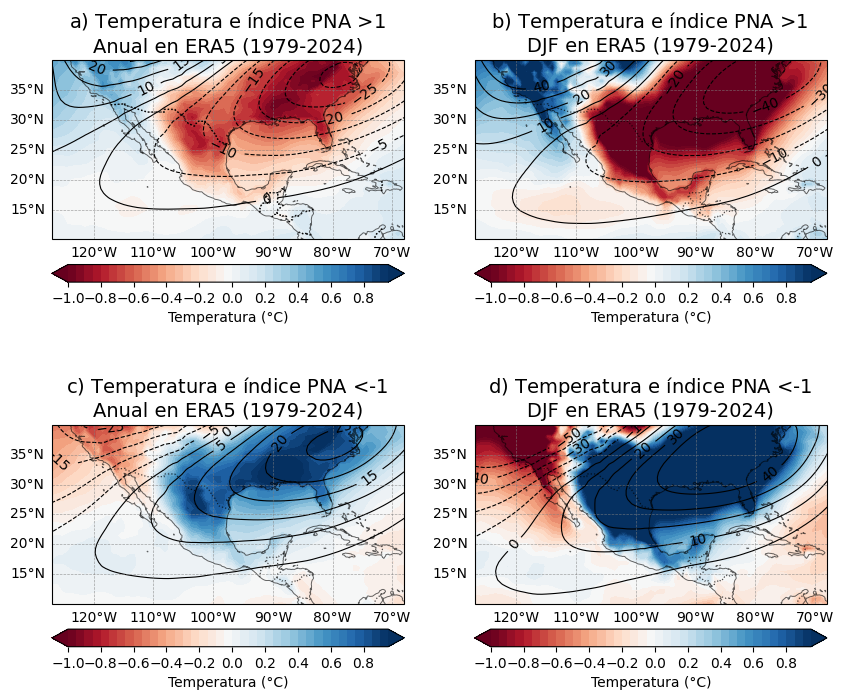

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
plt.subplots_adjust(wspace=0.2, hspace=0.45)
axs = axs.flatten()

# Subplot 1: ANUAL INDICE >1
ax = axs[0]
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(t2m_idxp_vals.longitude,t2m_idxp_vals.latitude,t2m_idxp_vals,levels=np.arange(-1,1,0.05),cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals, levels=np.arange(-30, 30, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('a$)$ Temperatura e índice PNA >1 \nAnual en ERA5 (1979-2024)', fontsize=14)

# Subplot 2: ANUAL ÍNDICE <-1
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(t2m_idxn_vals.longitude,t2m_idxn_vals.latitude,t2m_idxn_vals,levels=np.arange(-1,1,0.05),cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals, levels=np.arange(-30, 30, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('c$)$ Temperatura e índice PNA <-1 \nAnual en ERA5 (1979-2024)', fontsize=14)

# Subplot 3: DJF índice >1
ax = axs[1]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(t2m_idxp_DJF.longitude,t2m_idxp_DJF.latitude,t2m_idxp_DJF,levels=np.arange(-1,1,0.05),cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('b$)$ Temperatura e índice PNA >1 \nDJF en ERA5 (1979-2024)', fontsize=14)

# Subplot 4: DJF índice <-1
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(t2m_idxn_DJF.longitude,t2m_idxn_DJF.latitude,t2m_idxn_DJF,levels=np.arange(-1,1,0.05),cmap='RdBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Temperatura (°C)', fontsize=10)
ax.set_title('d$)$ Temperatura e índice PNA <-1 \nDJF en ERA5 (1979-2024)', fontsize=14)

# plt.show()

plt.savefig('figsok/TemperaturayPNA_E5')